In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('earthquakes.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-01-01 23:59:10,37.085500,-98.040667,6.36,1.56,ml,12.0,137.00,0.05775,0.0400,...,2017-03-02 15:40:54,"7km S of Anthony, Kansas",earthquake,0.19,0.61,0.128,13.0,reviewed,ismp,ismp
1,2017-01-01 23:50:58,62.798800,-149.467300,6.00,0.90,ml,NaN,NaN,NaN,0.6300,...,2017-01-06 02:34:10,"62km NNE of Talkeetna, Alaska",earthquake,NaN,0.40,NaN,NaN,reviewed,ak,ak
2,2017-01-01 23:50:39,32.966833,-115.562833,9.88,2.56,ml,47.0,75.00,0.06521,0.2400,...,2017-02-08 19:29:28,"3km WSW of Brawley, CA",earthquake,0.21,0.52,0.236,24.0,reviewed,ci,ci
3,2017-01-01 23:50:07,38.428400,-118.889200,5.50,1.20,ml,6.0,210.16,0.07200,0.0885,...,2017-03-14 05:05:00,"25km WSW of Hawthorne, Nevada",earthquake,NaN,7.90,0.250,2.0,reviewed,nn,nn
4,2017-01-01 23:47:17,38.428400,-118.901300,6.70,1.90,ml,13.0,70.02,0.07200,0.1497,...,2017-03-14 05:05:02,"26km WSW of Hawthorne, Nevada",earthquake,NaN,1.90,0.250,8.0,reviewed,nn,nn


In [3]:
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

As we are working with earthquakes, the most critical part is how often and where they occurred. Let's show all the shocks and their frequency on a map. 

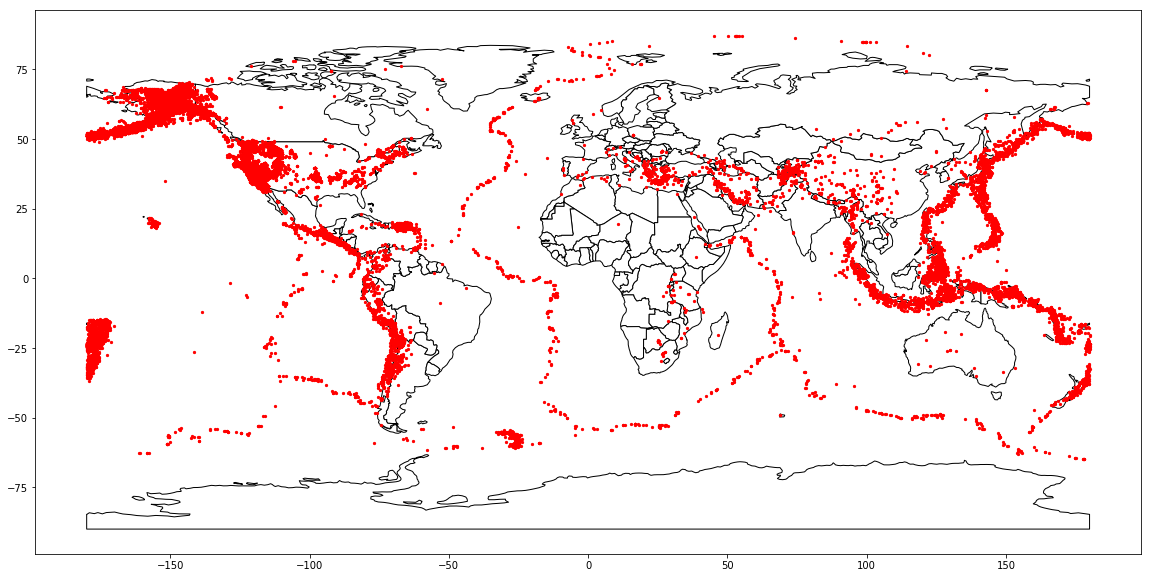

In [4]:
import geopandas as gpd
import numpy as np
from scipy import ndimage

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

from geopandas import GeoDataFrame
from shapely.geometry import Point

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world.plot()

geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
geo_df = df.drop(['latitude', 'longitude'], axis=1)
q_gdf = GeoDataFrame(df, crs=geo_df, geometry=geometry)
# gdf.plot()
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='black')
q_gdf.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show();

So, we can observe clear regions with high activity. This map is helpful to see the regional distribution of earthquakes, but it says nothing about their magnitude and time when they occurred.

So let's firstly build a histogram which would show monthly data for earthquakes and maybe there is some more active month than all others. Also, it might be nice to learn about where data come from, so we could build the distribution of data sources 

The following code is showing the number of earthquakes grouped by month. As we can see they are not equally distributed, but we can not make any conclusions as we have the data only for one year We could try to find some correlation between month or season and number of earthquakes if we have data for many years.
Therefore, this is the dead end in the current case, and we are not going to continue this exploration

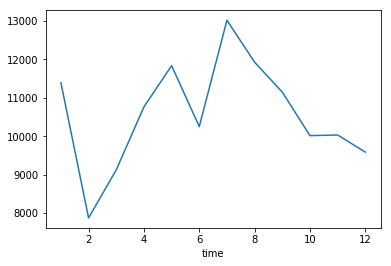

In [10]:
df["time"] = df["time"].astype("datetime64[ns]")
df.groupby(df["time"].dt.month).count()['id'].plot()

The map above could be handy to observe the full picture, but it is too noisy. Depending on a particular case we could be interested in small or large earthquakes. For general purpose, let discover where the larges shocks were and how are they distributed.

In [ ]:
# for i in range(0,len(GeoDataFrame)):
# GeoDataFrame.geometry.iloc[i:i+1].plot(ax = ax, markersize = GeoDataFrame['Marker Size'].iloc[i])

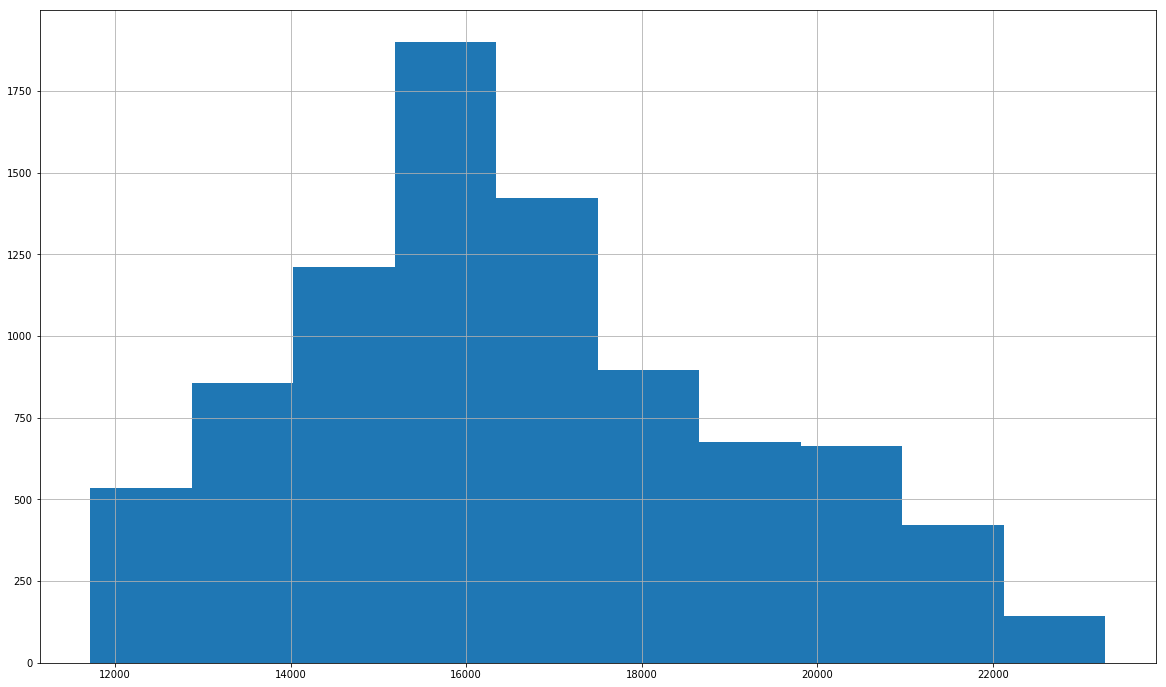

In [8]:
df = df[df.consumption > 0]

plt.figure(figsize = [20, 12])
plt.hist(df.consumption)
plt.grid()
plt.show()

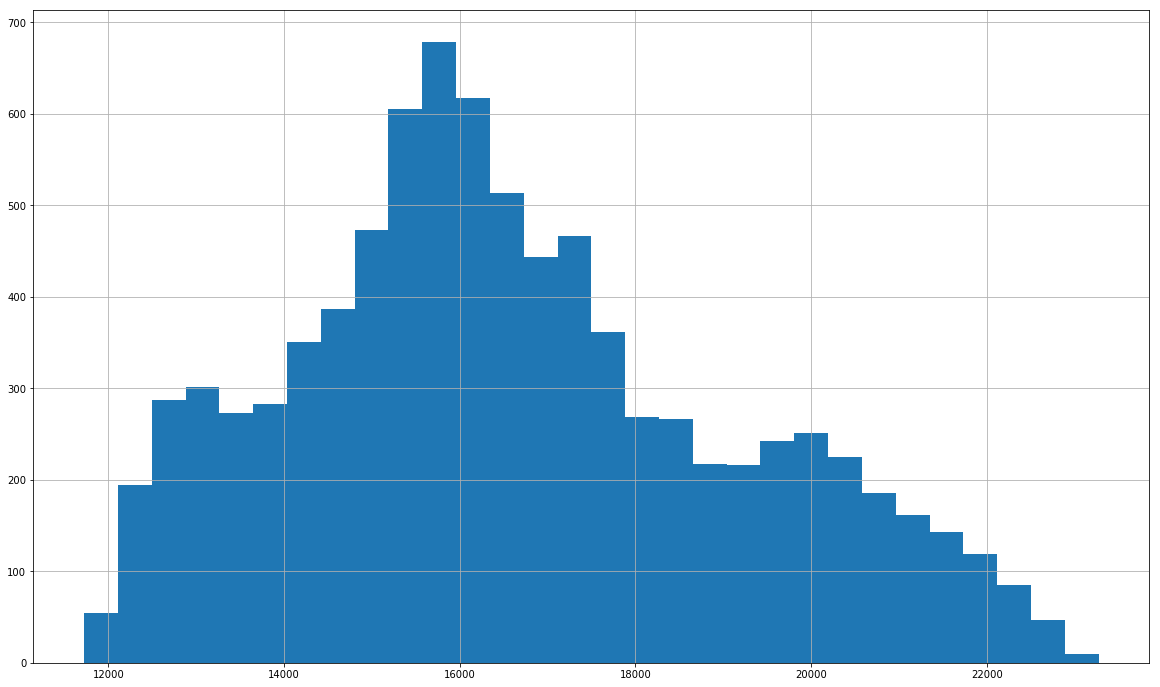

In [93]:
plt.figure(figsize = [20, 12])
plt.hist(df.consumption, bins = 30)
plt.grid()
plt.show()

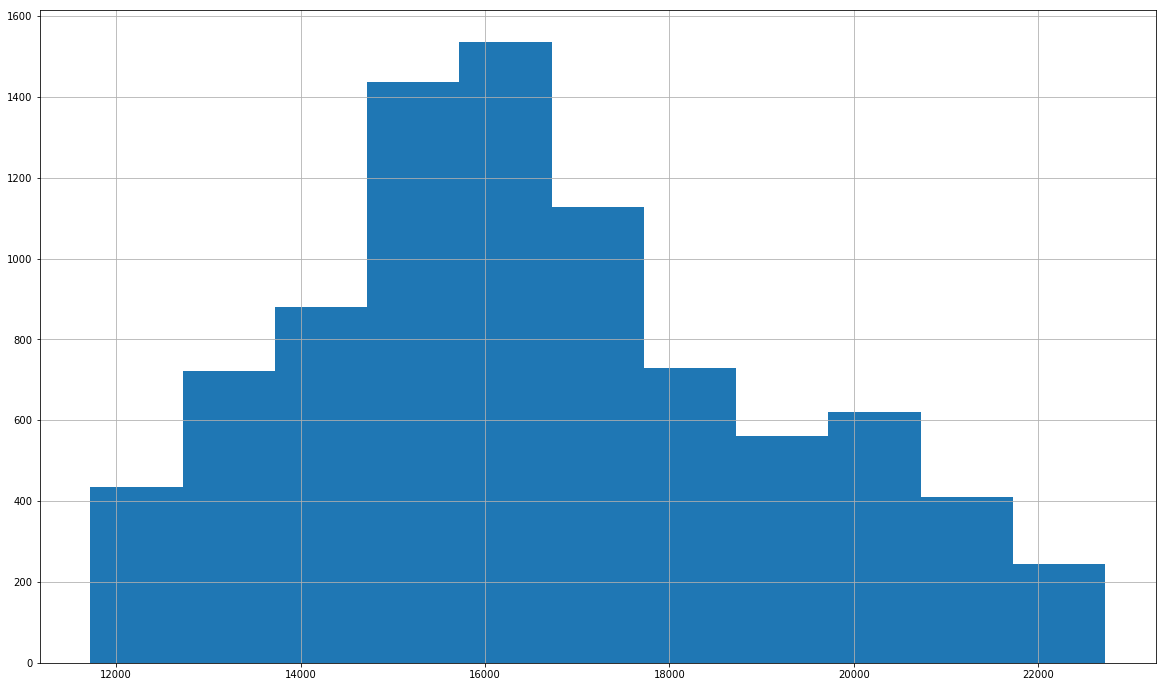

In [9]:
bins = range(min(df.consumption), max(df.consumption)+1, 1000)

plt.figure(figsize = [20, 12])
plt.hist(df.consumption, bins = bins)
plt.grid()
plt.show()

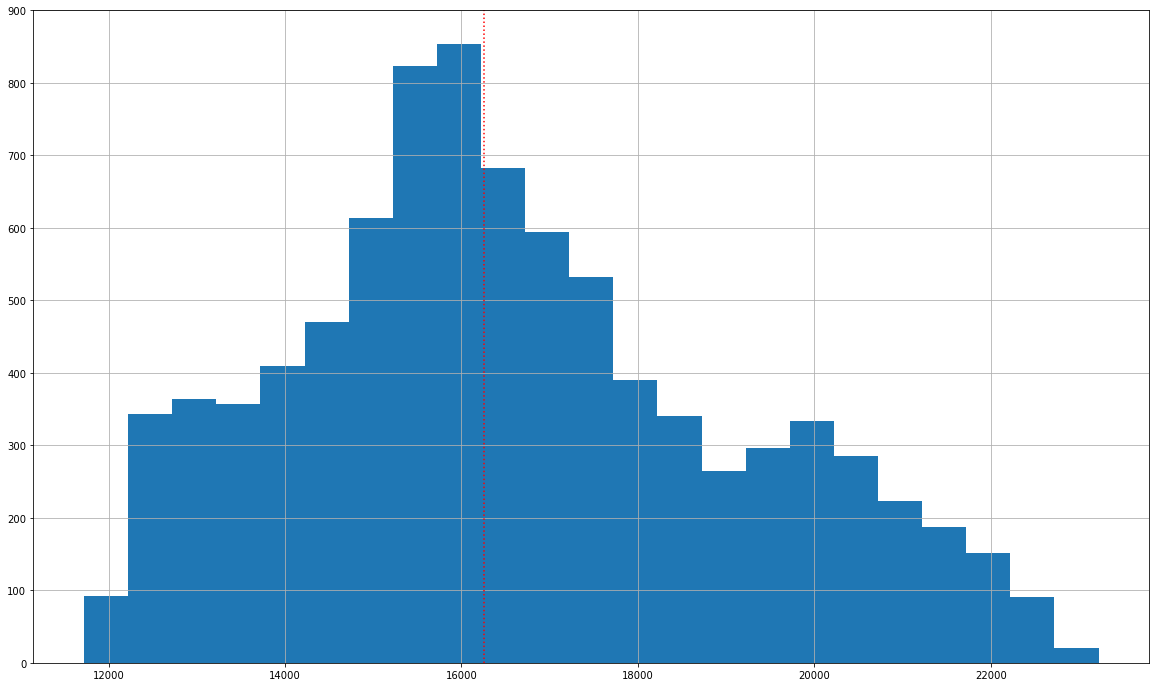

In [14]:
bins = range(min(df.consumption), max(df.consumption)+1, 500)

plt.figure(figsize = [20, 12])
plt.hist(df.consumption, bins = bins)
plt.vlines(df.consumption.median(), ymin = 0, ymax = 900, linestyles = 'dotted', colors = 'red')
plt.ylim(0,900)
plt.grid()
plt.show()

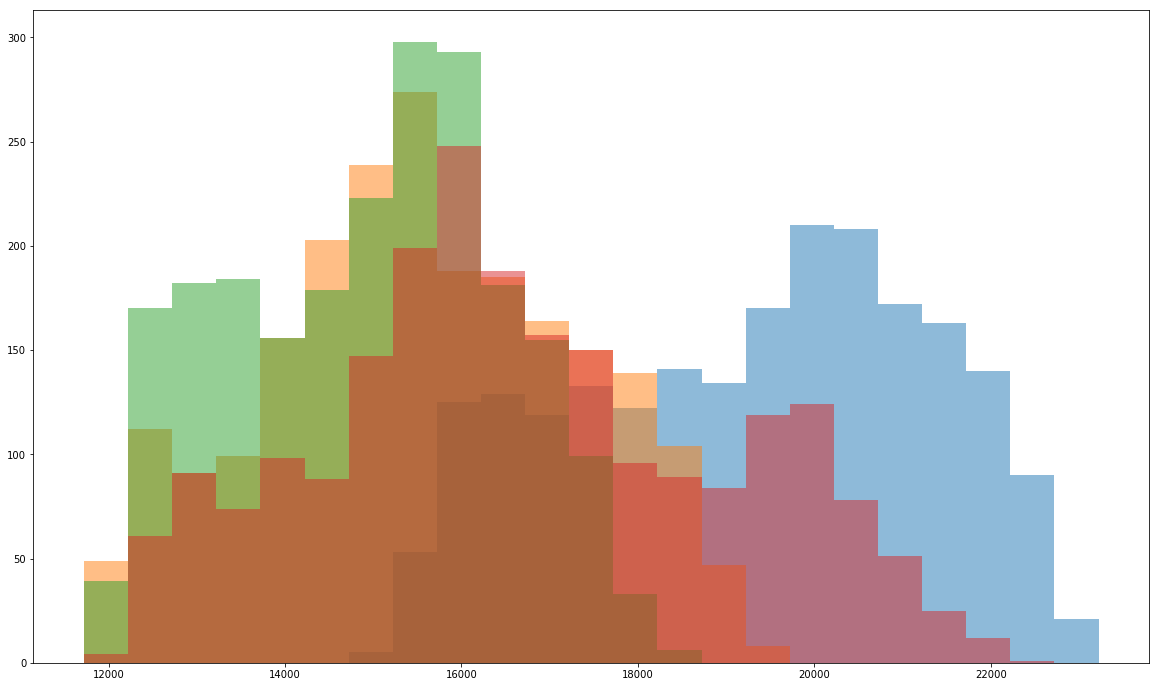

In [38]:
bins = range(min(df.consumption), max(df.consumption)+1, 500)

plt.figure(figsize = [20, 12])

for season in df.season.unique():
    plt.hist(df[df.season == season].consumption,
             bins = bins, alpha = 0.5)

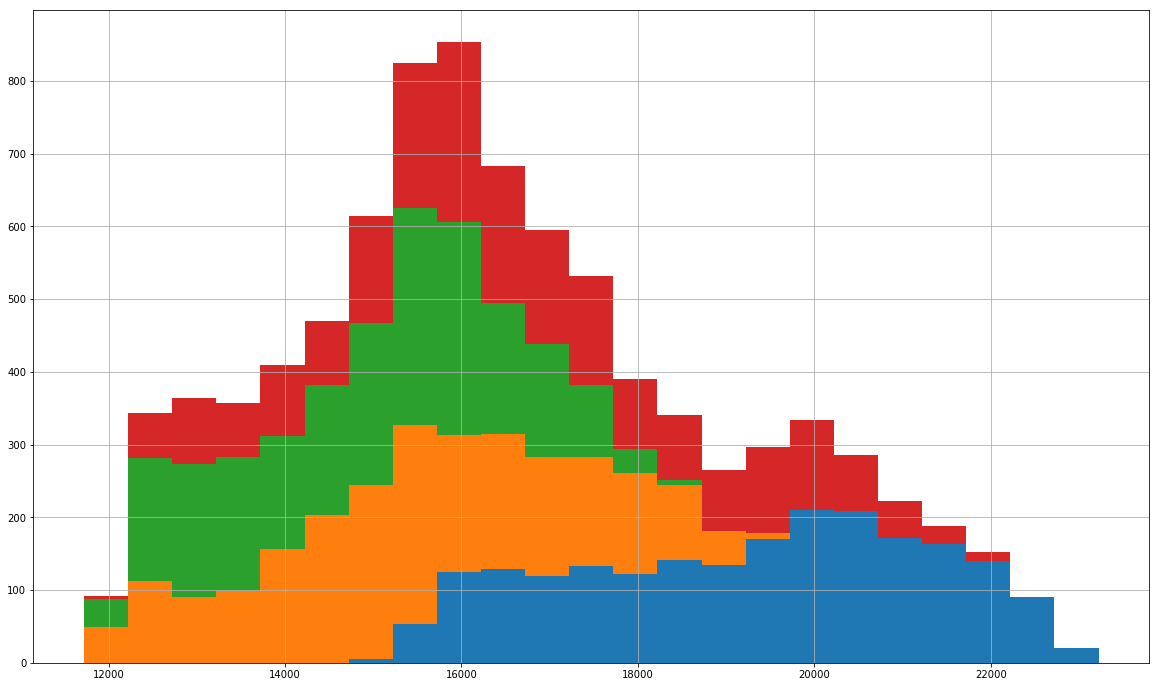

In [16]:
bins = range(min(df.consumption), max(df.consumption)+1, 500)

plt.rcParams['figure.figsize'] = [20, 12]

plt.hist([df[df.season == 'Зима'].consumption,
          df[df.season == 'Весна'].consumption,
          df[df.season == 'Літо'].consumption,
          df[df.season == 'Осінь'].consumption], stacked = True, bins = bins)

plt.grid()
plt.show()

In [18]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'ax

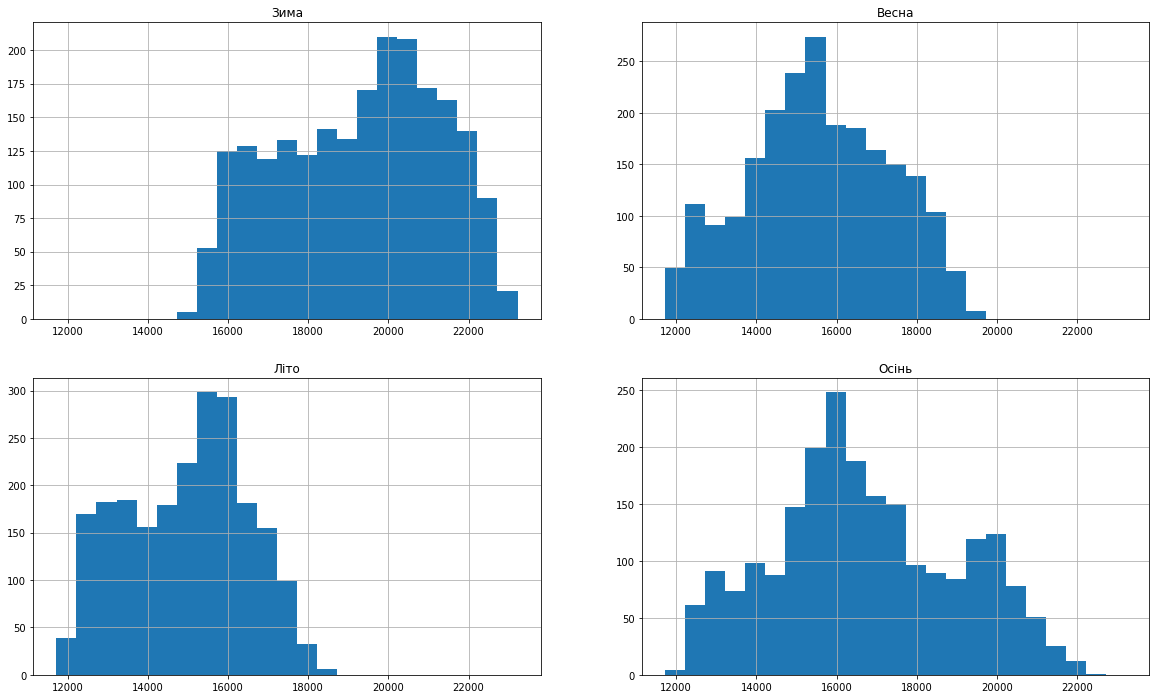

In [98]:
bins = range(min(df.consumption), max(df.consumption)+1, 500)

for i in range(0, len(df.season.unique())):
    plt.subplot(2, 2, i+1)
    plt.hist(df[df.season ==  df.season.unique()[i]].consumption, bins = bins)
    plt.title(df.season.unique()[i])
    plt.grid()

plt.show()

In [24]:
df.datetime =  pd.to_datetime(df.datetime, format='%Y-%m-%d %H:%M:%S')
df.dtypes

datetime       datetime64[ns]
nuclear                 int64
heat_tec                int64
wind                    int64
heat_tes                int64
hydro_ges               int64
hydro_gaes              int64
consumption             int64
month                   int64
season                 object
hour                    int64
dtype: object

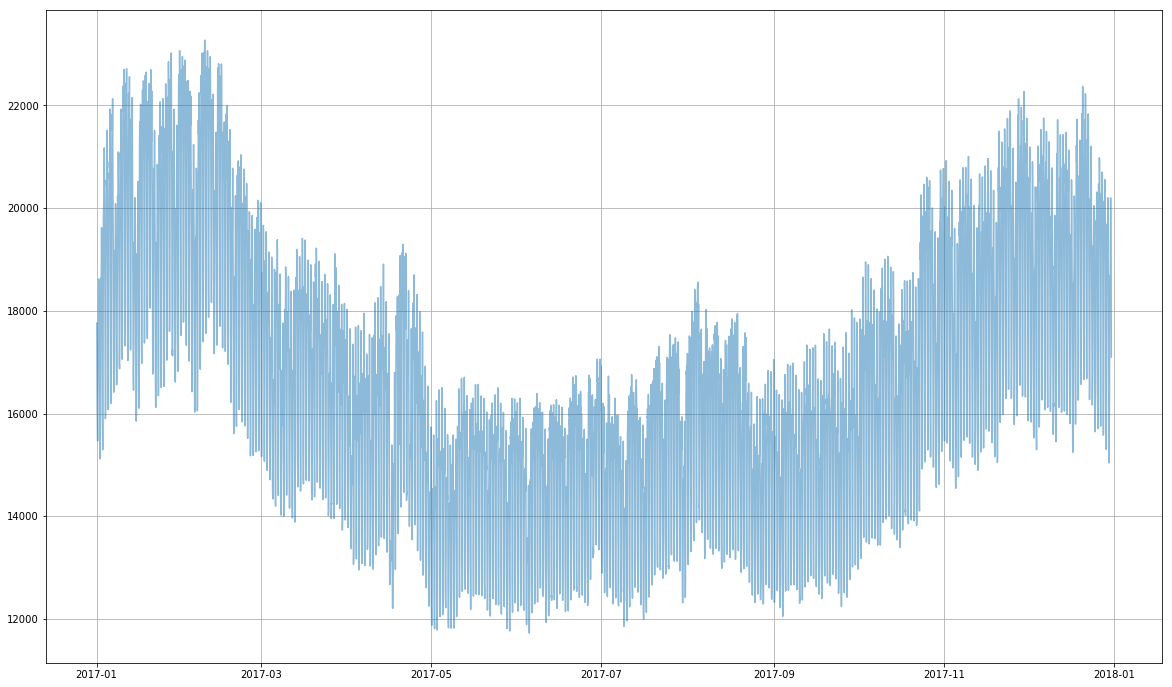

In [25]:
plt.plot(df.datetime, df.consumption, alpha = 0.5)
plt.grid()
plt.show()

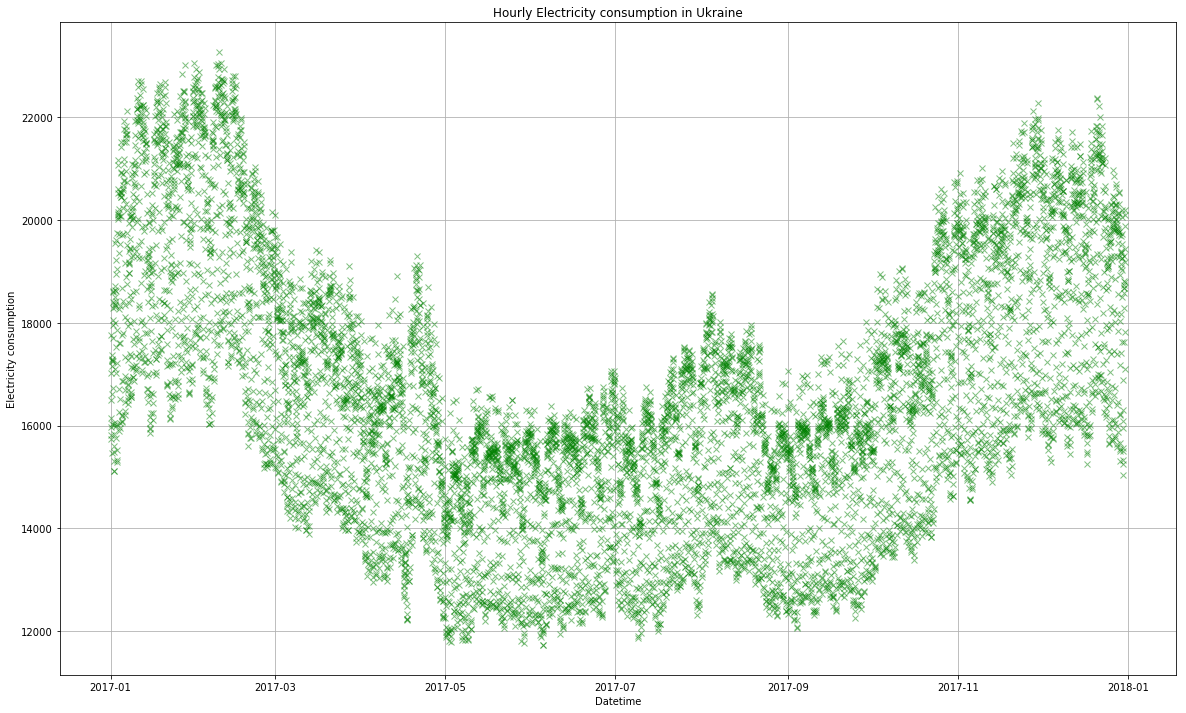

In [34]:
plt.plot(df.datetime, df.consumption, 'xg', alpha = 0.5)
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('Electricity consumption')
plt.title('Hourly Electricity consumption in Ukraine')
plt.show()

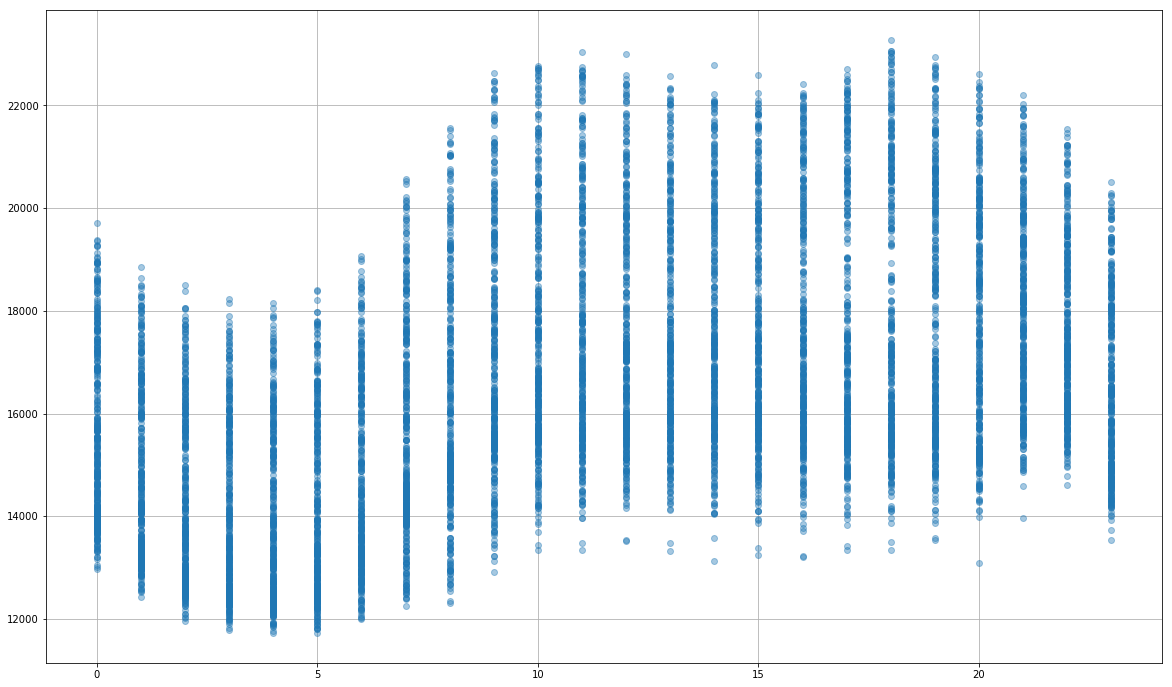

In [101]:
plt.plot(df.hour, df.consumption, 'o', alpha = 0.4)

plt.grid()

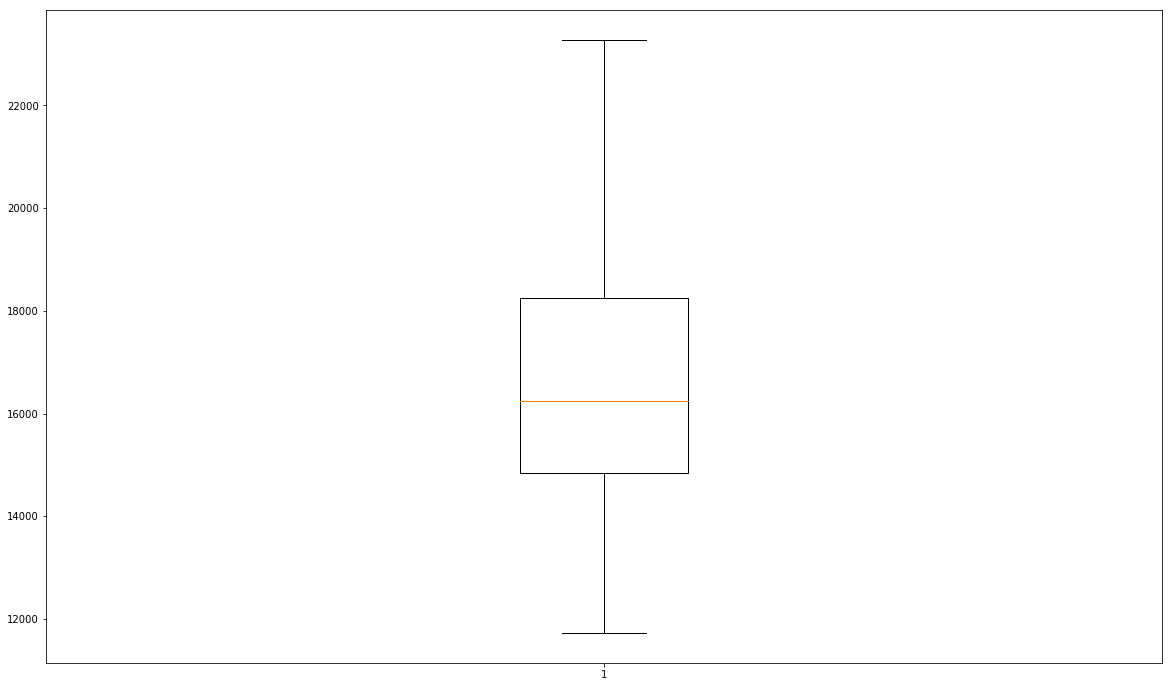

In [102]:
plt.boxplot(df.consumption)
plt.show()

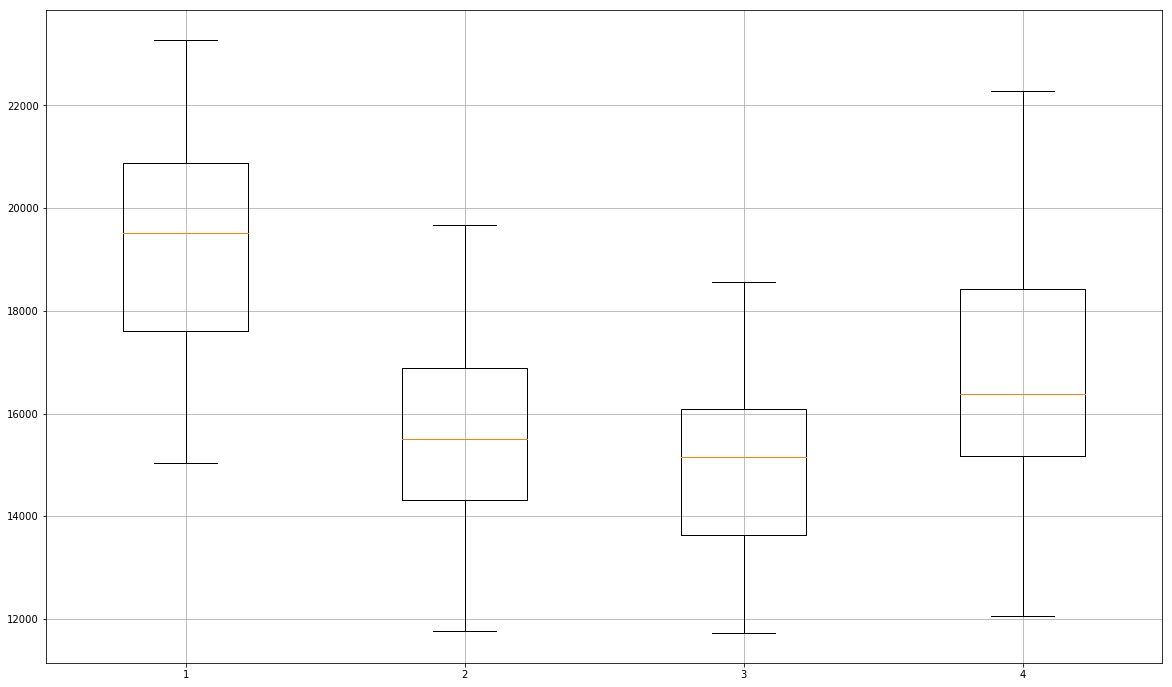

In [103]:
plt.boxplot([df[df.season == 'Зима'].consumption,
             df[df.season == 'Весна'].consumption,
             df[df.season == 'Літо'].consumption,
             df[df.season == 'Осінь'].consumption])
plt.grid()
plt.show()

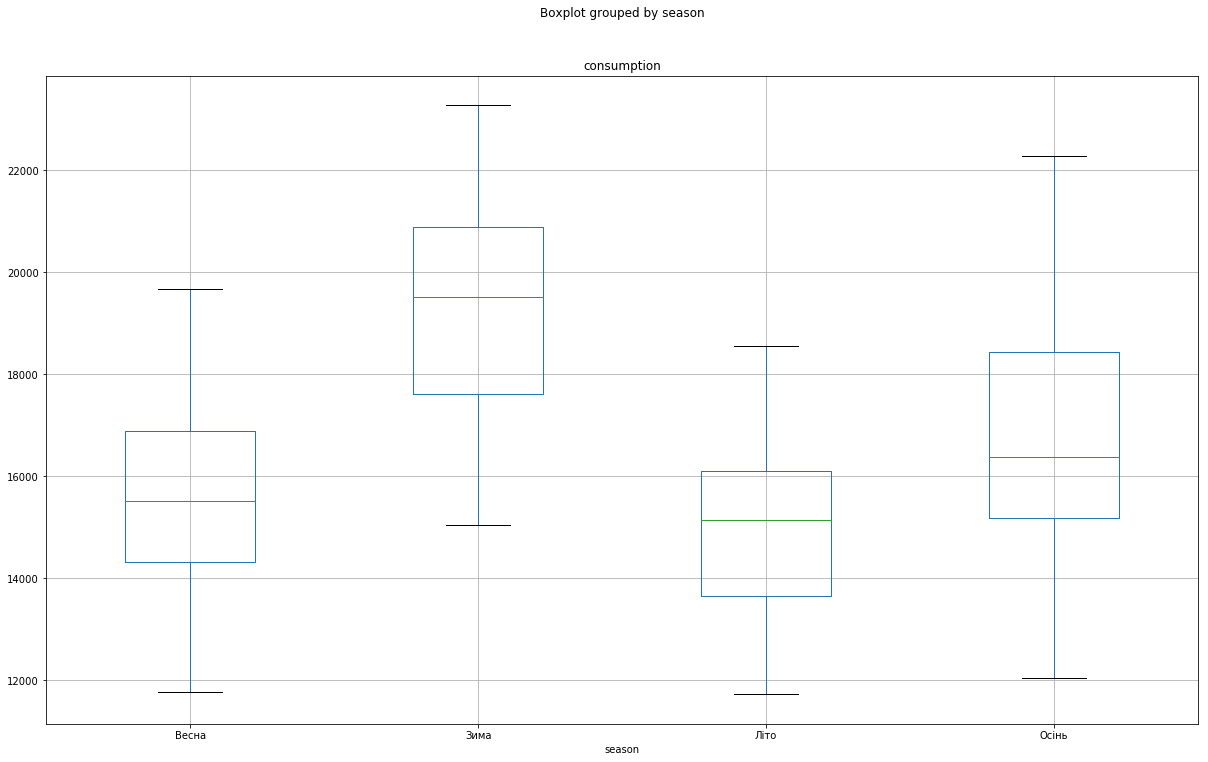

In [104]:
df.boxplot(column='consumption', by = 'season')